___
<h1 style="color:blue;">Local Outlier Factor (LOF)</h1>

___


## Introduction to Local Outlier Factor (LOF)

Local Outlier Factor (LOF) is an unsupervised anomaly detection algorithm that identifies outliers in a dataset based on the local density deviation of a data point with respect to its neighbors. The algorithm assigns an anomaly score to each instance, which indicates how likely the instance is to be an outlier. Instances with higher anomaly scores are considered outliers, while instances with lower anomaly scores are considered normal.
## Key Concepts

The Local Outlier Factor (LOF) algorithm is based on the following key concepts:

1. **Local Density**: The algorithm estimates the local density of each instance by calculating the distance to its k-nearest neighbors. Instances in low-density regions have higher anomaly scores, while instances in high-density regions have lower anomaly scores.
2. **Local Reachability Density**: The algorithm calculates the local reachability density of each instance by considering the local density of its neighbors. Instances with significantly lower local reachability density compared to their neighbors are considered outliers.
3. **Local Outlier Factor**: The algorithm computes the Local Outlier Factor (LOF) for each instance by comparing its local reachability density with the local reachability densities of its neighbors. Instances with higher LOF values are considered outliers.
4. **Anomaly Score**: An anomaly score is assigned to each instance based on its LOF value. Instances with higher anomaly scores are more likely to be outliers, while instances with lower anomaly scores are more likely to be normal.
5. **Thresholding**: Anomalies are identified based on a predefined threshold value. Instances with anomaly scores higher than the threshold are considered outliers.

### Isolation Forest Algorithm

The Isolation Forest algorithm is an unsupervised anomaly detection algorithm that identifies outliers in a dataset by isolating instances in a random forest. The algorithm works by recursively partitioning the dataset into subsets until each instance is isolated in its own leaf node. The number of partitions required to isolate an instance is used as a measure of the instance's anomaly score. Instances that require fewer partitions are considered outliers, while instances that require more partitions are considered normal.
### Advantages and Limitations

#### Advantages
- Ability to detect outliers in high-dimensional datasets
- Robustness to noise and outliers
- Scalability to large datasets
- Flexibility to handle different types of data
- Interpretability of anomaly scores
- Ability to handle class imbalance

#### Limitations
- Sensitivity to the choice of hyperparameters
- Interpretability of anomaly scores
- Computationally expensive for large datasets
- Limited ability to handle non-linear relationships
- Limited ability to handle categorical variables
- Limited ability to handle missing values
- Limited ability to handle skewed distributions
- Limited ability to handle imbalanced datasets
- Limited ability to handle high-dimensional datasets

## Credit Card Fraud Detection Dataset

### Overview
The Credit Card Fraud Detection dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, with the positive class (frauds) accounting for 0.172% of all transactions.

### Features
1. **Time**: Number of seconds elapsed between this transaction and the first transaction in the dataset.
2. **V1-V28**: Principal components obtained with PCA, anonymized due to confidentiality reasons.
3. **Amount**: Transaction amount.
4. **Class**: 1 for fraudulent transactions, 0 otherwise.

### Use Case
This dataset is commonly used for anomaly detection and fraud detection tasks. Techniques like Isolation Forest, Local Outlier Factor (LOF), and One-Class SVM are applied to identify fraudulent transactions based on the transaction features provided.

### Source
The dataset is available on [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).



___
## <span style="color:blue;">Data Exploration and Preprocessing</span>

___


In [1]:
# import the necessary libraries
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix


# Load the Iris dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

>  Making Histograms of the data to understand the distribution of the data.

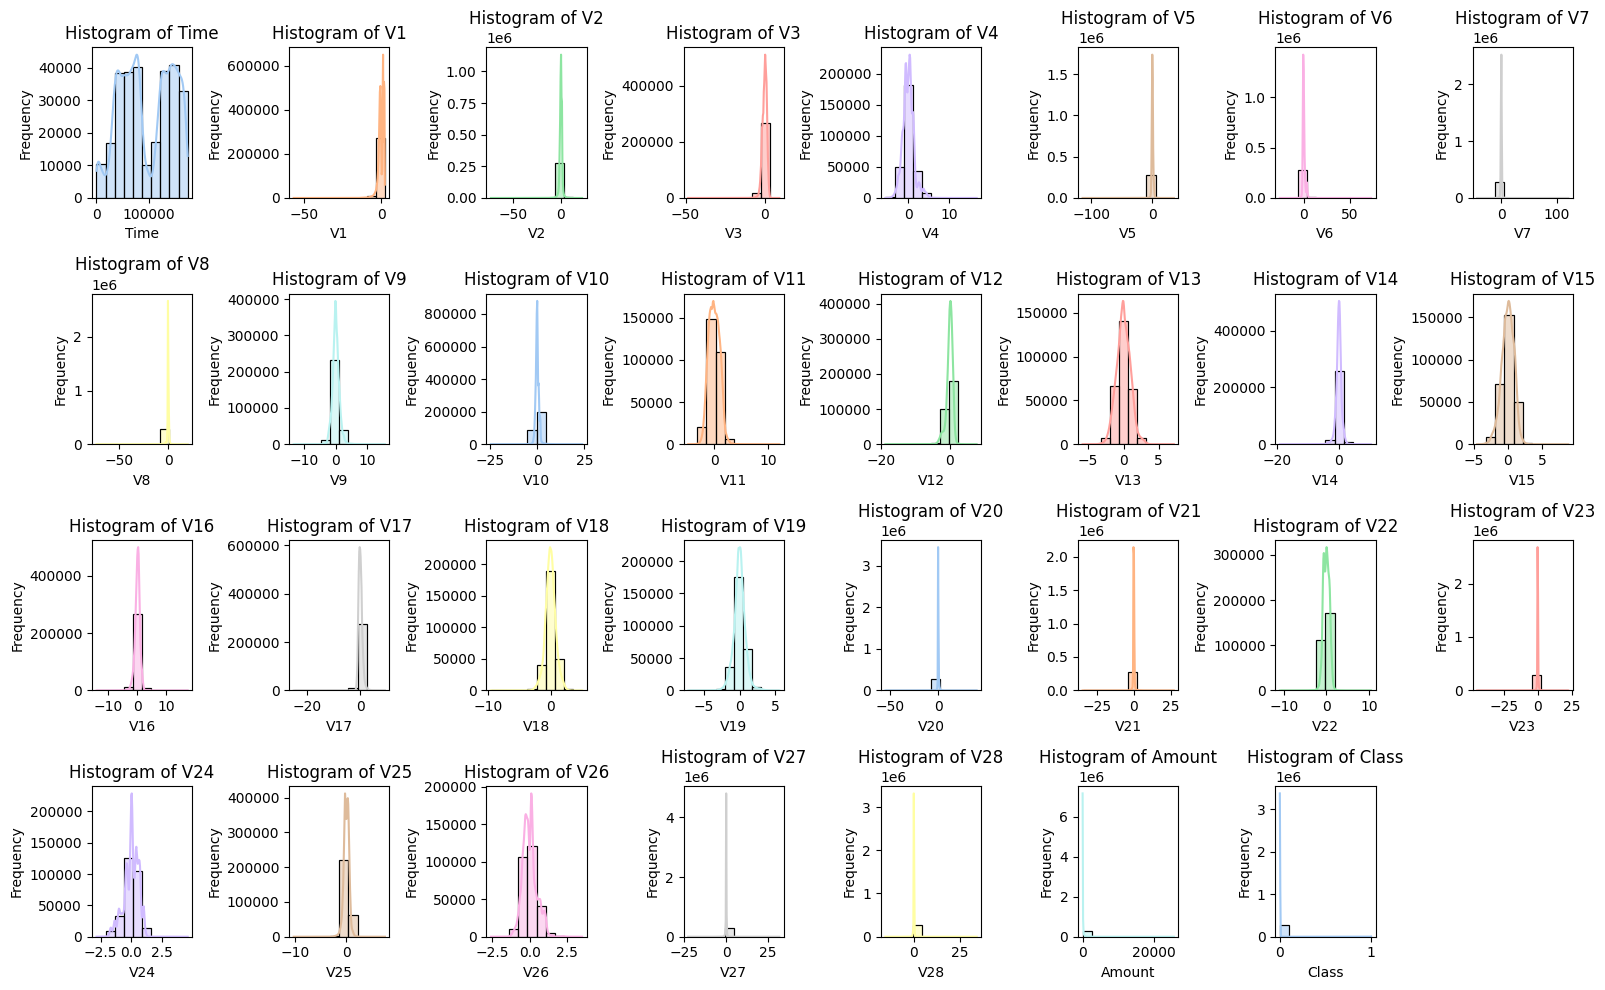

In [3]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(4,8, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making box plots to understand the spread of the data.

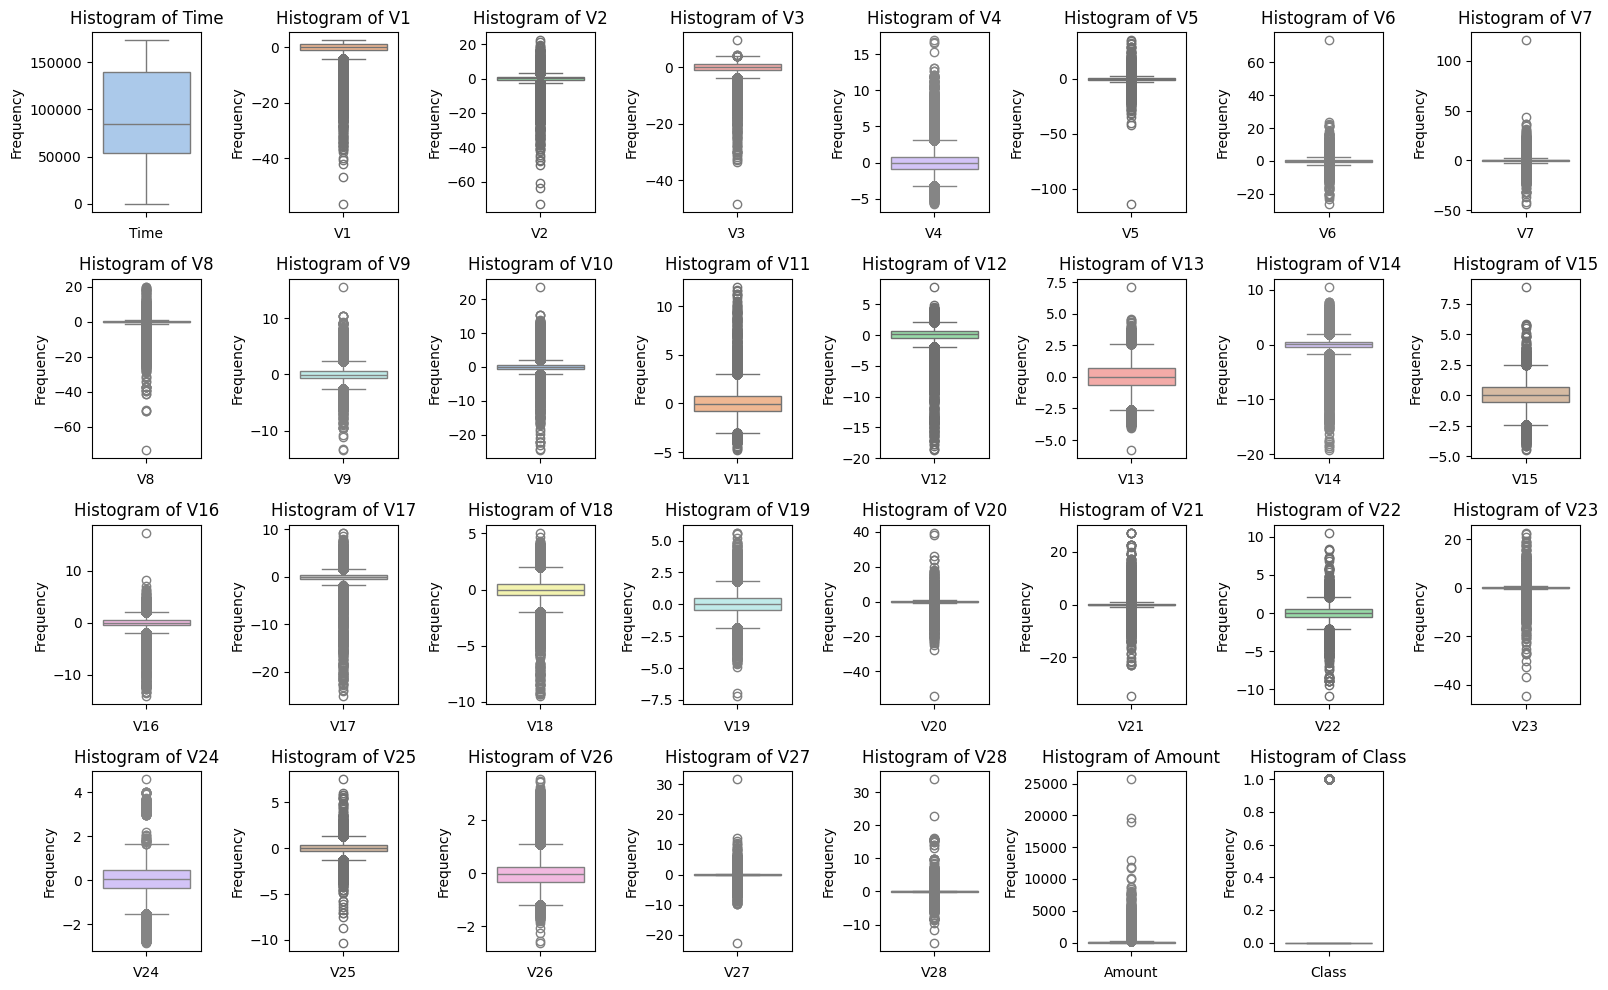

In [4]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(4, 8, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn Local Outlier Factor (LOF) Model:

In [5]:
# Select features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
y_pred = lof.fit_predict(X)



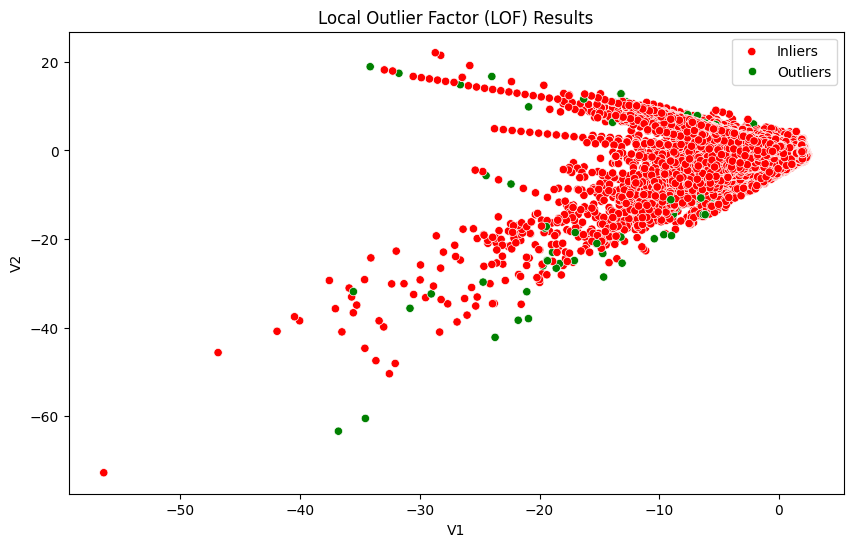

In [8]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['V1'], y=X['V2'], hue=y_pred, palette={0: 'blue', 1: 'red', -1: 'green'})
plt.title('Local Outlier Factor (LOF) Results')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(['Inliers', 'Outliers'])
plt.show()

___
## <span style="color:blue;">Model Evaluation</span>

___

In [ ]:
# Convert -1/1 predictions to 0/1 (outlier/inlier)
y_pred = [1 if x == -1 else 0 for x in y_pred]

# Print classification report
print("Classification Report:")
print(classification_report(y_reduced, y_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.02      0.88      0.03       492
           1       1.00      0.90      0.95    284315

    accuracy                           0.90    284807
   macro avg       0.51      0.89      0.49    284807
weighted avg       1.00      0.90      0.95    284807



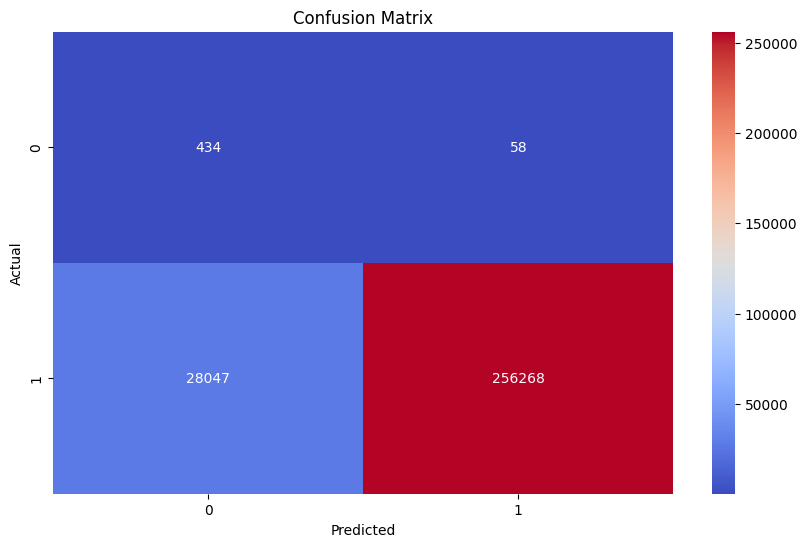

In [ ]:
# Print confusion matrix
cm=confusion_matrix(y_reduced, y_pred)

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced['V1'], y=X_reduced['V2'], hue=y_pred, palette={0: 'blue', 1: 'red'})
plt.title('Local Outlier Factor (LOF) Results')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend(['Inliers', 'Outliers'])
plt.show()

___
## <span style="color:blue;">CONCLUSION</span>

___

### Summary of Local Outlier Factor (LOF) Evaluation

The Local Outlier Factor (LOF) was applied to the dataset to identify anomalies. Here are the key findings from the LOF analysis:

- **Classification Report**:
  - **Outliers (-1)**:
    - Precision: 0.02
    - Recall: 0.88
    - F1-Score: 0.03
  - **Inliers (1)**:
    - Precision: 1.00
    - Recall: 0.90
    - F1-Score: 0.95

- **Overall Performance**:
  - Accuracy: 0.90
  - Macro Average Precision: 0.51
  - Macro Average Recall: 0.89
  - Macro Average F1-Score: 0.49
  - Weighted Average Precision: 1.00
  - Weighted Average Recall: 0.90
  - Weighted Average F1-Score: 0.95

### Insights and Recommendations

Based on the evaluation metrics:

- **Outliers (-1)**:
  - The model achieves a high recall of 0.88, indicating that it successfully identifies most of the outliers.
  - However, the precision is very low at 0.02, meaning there are many false positives (normal data points classified as outliers).
  - The F1-score of 0.03 reflects this imbalance, showing that while outliers are detected, the precision needs improvement.

- **Inliers (1)**:
  - The model performs exceptionally well in identifying inliers, with a precision and recall of 1.00 and 0.90, respectively.
  - The high F1-score of 0.95 indicates a good balance between precision and recall for this class.

### Recommendations

- **Model Improvement**:
  - Further tuning of hyperparameters might improve the precision for detecting outliers.
  - Considering additional features or different feature selection methods could enhance the model's ability to distinguish outliers from inliers.

- **Further Analysis**:
  - Conduct a detailed analysis of the false positives to understand the underlying reasons for their misclassification.
  - Explore other anomaly detection techniques such as Isolation Forest or One-Class SVM for comparison and potential improvement.

### Acknowledgments

- **Data Source**: The dataset used in this analysis is publicly available.
- **Tools**: Python, Scikit-learn, Pandas, Matplotlib, and Seaborn were instrumental in data preprocessing, LOF model development, and evaluation.

Overall, the LOF model showed good performance in identifying inliers but requires further improvement for more accurate detection of outliers.